# De los datos del IMSS:

- Adecuar los "headers" para que sean cortos y significativos. ✅
- Rellenar datos en caso de ser necesario. ✅
- Mostrar graficas con las matrices de correlación, gráficas de barras y transformaciones tipo logarítmicas (sólo sí es necesario) ✅
- Generar una tabla con estadística descriptiva. ✅
- Estandarizar los datos ✅
- Analizar, si es posible generar nuevas columnas con "ratios de variables" ✅
- Hacer el proceso con Pipelines
- Predecir el número de pacientes que llegan a hospitalización a partir de admisión y terapia intensiva mediante regresión lineal.


>Entregar un pequeño reporte con los pasos realizados y las gráficas y tablas obtenidas. Agregar su código. Todo se agrega en un archivo .zip

# Paso I / VIII
Cargar los datos desde google drive

In [29]:
# Install google-colab package
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

try:
    from google.colab import drive  # type: ignore
    drive.mount('/content/drive')
    file_path = '/content/drive/My Drive/Colab Notebooks/data/datos_reorganizados.csv'  # Ajusta la ruta
except ImportError:
    file_path = 'datos_reorganizados.csv'

In [30]:

df = pd.read_csv(file_path)

# Mostrar las primeras filas
df.head()

,año,mes,Numero de pacientes que ingresan a Admision Hospitalaria,Numero de personas con ingreso de admision contínua a Hospital,Numero de personas con ingreso de admision urgencias a terapia,Numero de pacientes en alta de admision,Defunciones en Terapias,Pacientes de terapia a Hospital,Defunciones en Urgencias,Egresos Hospitalarios,Defunciones Hospitalarias,Intervenciones quirúrgicas,uso de tiempo quirurgico fin de semana en horas,uso de tiempo quirurgico dias habiles en horas
0,2018,ENERO,1813,10,50,1601,6,58,50,1089,70,815,336,3168
1,2018,FEBRERO,861,67,35,1505,20,50,35,1070,81,864,420,2880
2,2018,MARZO,713,2,43,1481,11,61,43,926,53,865,336,2736
3,2018,ABRIL,1369,5,32,1694,8,68,32,994,48,891,336,3024
4,2018,MAYO,1322,13,54,1629,16,50,54,879,48,883,336,2880


# Paso II / VIII
Vamos a adecuar los headers:
```python

"""
Header 0 : año -> anio
Header 1 : mes -> mes
Header 2 : Numero de pacientes que ingresan a Admision Hospitalaria -> numero_pacientes_admision_hospitalaria
Header 3 : Numero de personas con ingreso de admision contínua a Hospital -> numero_pacientes_admision_continua
Header 4 : Numero de personas con ingreso de admision urgencias a terapia -> numero_pacientes_admision_urgencias
Header 5 : Numero de pacientes en alta de admision -> numero_pacientes_alta_admision
Header 6 : Defunciones en Terapias -> defunciones_terapia
Header 7 : Pacientes de terapia a Hospital -> pacientes_terapia_hospital
Header 8 : Defunciones en Urgencias -> defunciones_urgencias
Header 9 : Egresos Hospitalarios -> egresos_hospitalarios
Header 10 : Defunciones Hospitalarias -> defunciones_hospitalarias
Header 11 : Intervenciones quirúrgicas -> intervenciones_quirogicas
Header 12 : uso de tiempo quirurgico fin de semana en horas -> uso_tiempo_quirogico_fin_semana_horas
header 13: uso de tiempo quirurgico dias habiles en horas -> uso_tiempo_quirogico_dias_habiles_horas
"""
```


In [31]:

# renombrar las columnas
df.rename(columns={
    'año': 'anio',
    'mes': 'mes',
    'Numero de pacientes que ingresan a Admision Hospitalaria': 'numero_pacientes_admision_hospitalaria',
    'Numero de personas con ingreso de admision contínua a Hospital': 'numero_pacientes_admision_continua',
    'Numero de personas con ingreso de admision urgencias  a terapia': 'numero_pacientes_admision_urgencias',
    'Numero de pacientes en alta  de admision ': 'numero_pacientes_alta_admision',
    'Defunciones en Terapias': 'defunciones_terapia',
    'Pacientes de terapia a Hospital': 'pacientes_terapia_hospital',
    'Defunciones en Urgencias ': 'defunciones_urgencias',
    'Egresos Hospitalarios': 'egresos_hospitalarios',
    'Defunciones Hospitalarias': 'defunciones_hospitalarias',
    'Intervenciones quirúrgicas': 'intervenciones_quirogicas',
    'uso de tiempo quirurgico fin de semana en horas': 'uso_tiempo_quirogico_fin_semana_horas',
    'uso de tiempo quirurgico dias habiles en horas': 'uso_tiempo_quirogico_dias_habiles_horas'
}, inplace=True)
# Mostrar las primeras filas
df.head(10)




,anio,mes,numero_pacientes_admision_hospitalaria,numero_pacientes_admision_continua,numero_pacientes_admision_urgencias,numero_pacientes_alta_admision,defunciones_terapia,pacientes_terapia_hospital,defunciones_urgencias,egresos_hospitalarios,defunciones_hospitalarias,intervenciones_quirogicas,uso_tiempo_quirogico_fin_semana_horas,uso_tiempo_quirogico_dias_habiles_horas
0,2018,ENERO,1813,10,50,1601,6,58,50,1089,70,815,336,3168
1,2018,FEBRERO,861,67,35,1505,20,50,35,1070,81,864,420,2880
2,2018,MARZO,713,2,43,1481,11,61,43,926,53,865,336,2736
3,2018,ABRIL,1369,5,32,1694,8,68,32,994,48,891,336,3024
4,2018,MAYO,1322,13,54,1629,16,50,54,879,48,883,336,2880
5,2018,JUNIO,736,25,42,1699,15,64,42,972,47,907,420,3024
6,2018,JULIO,696,23,50,1637,18,50,54,1116,63,923,336,3168
7,2018,AGOSTO,532,13,31,1738,11,65,30,1122,57,1001,378,3168
8,2018,SEPTIEMBRE,968,14,40,1627,12,60,40,1084,65,966,294,3168
9,2018,OCTUBRE,805,15,34,1620,13,70,34,1151,57,915,336,3168


# Paso III / VIII
Generar gráficas de barras y matrices de correlación

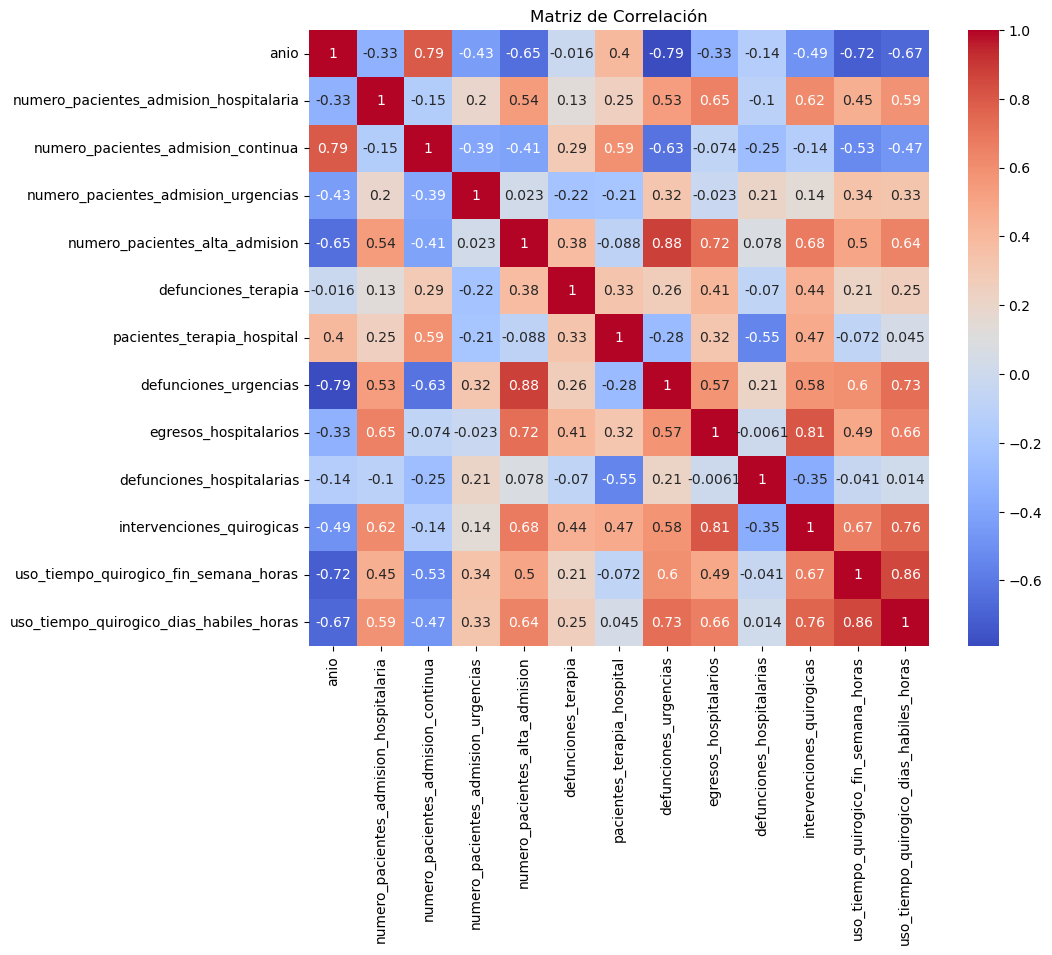

In [32]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.savefig('matriz_correlacion.pdf')

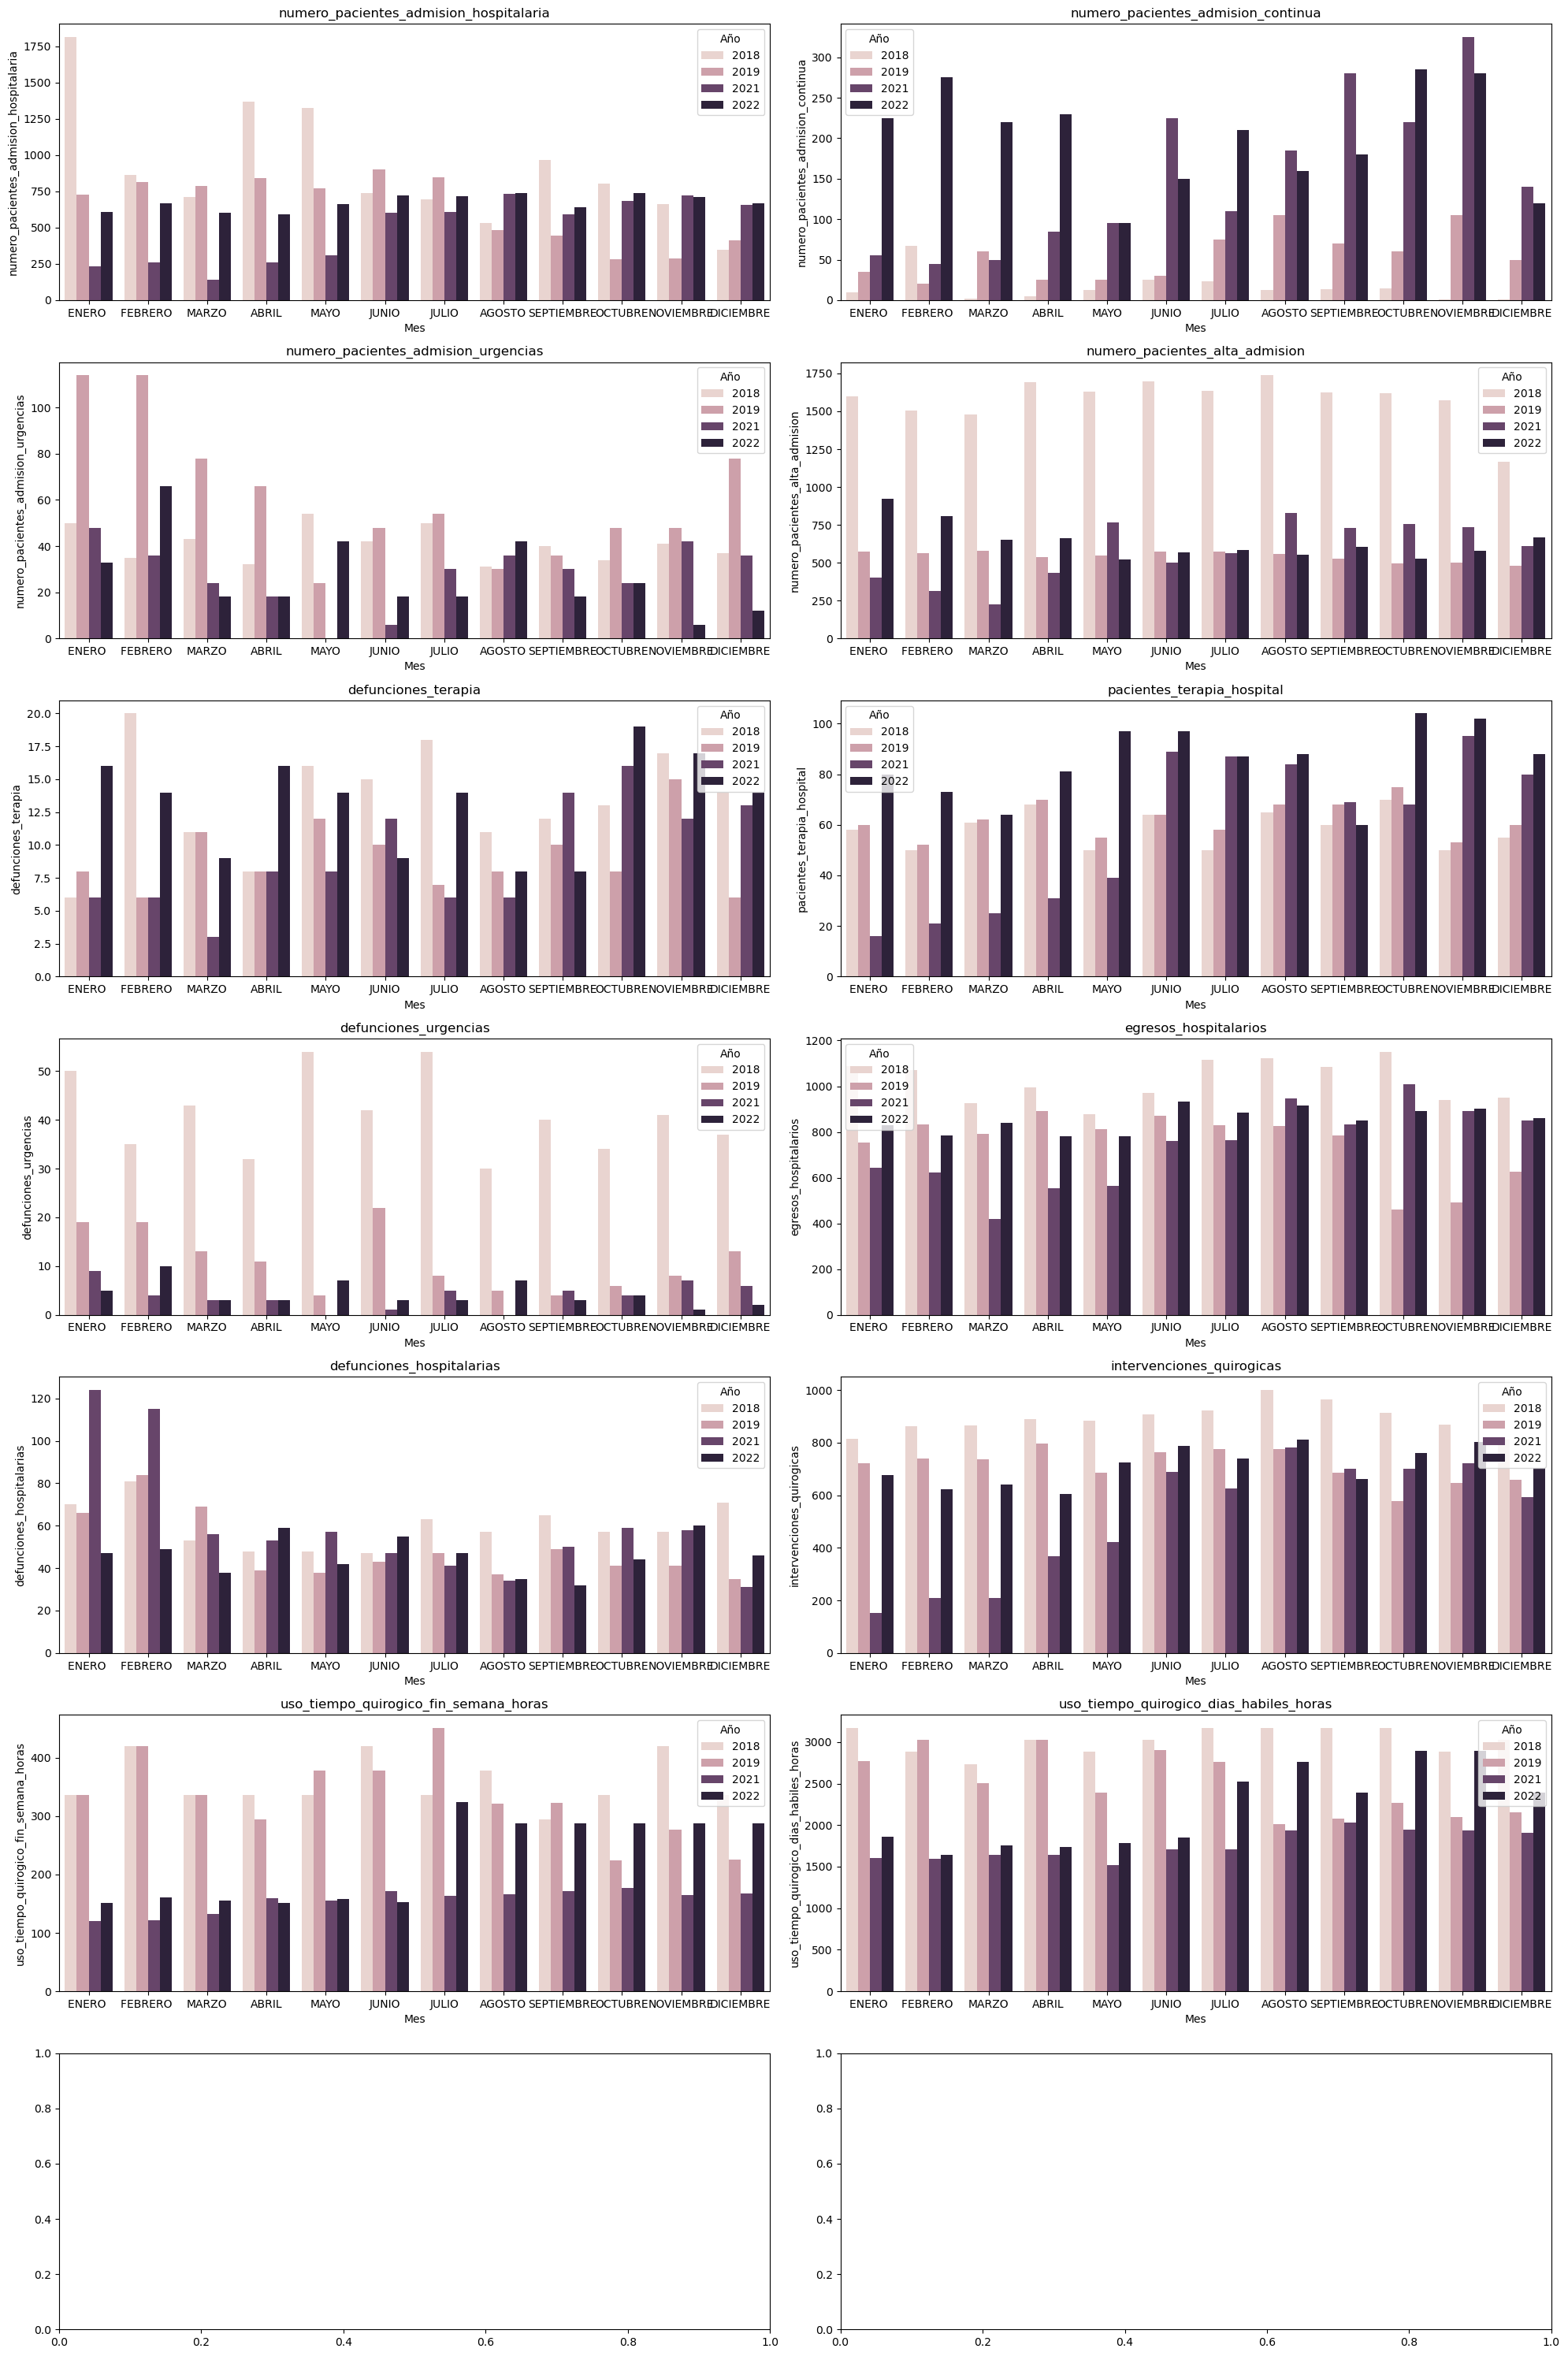

In [33]:
# Grafica de barras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear una figura grande para contener todos los gráficos
fig, axes = plt.subplots(7, 2, figsize=(20, 30))
axes = axes.flatten()

# Gráfica de barras para cada columna numérica, comenzando desde la segunda columna
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns[1:]):
    sns.barplot(x='mes', y=col, hue='anio', data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Mes')
    axes[i].set_ylabel(col)
    axes[i].legend(title='Año')

#fig.delaxes(axes[-1])
plt.tight_layout()
plt.savefig('graficas_barras.pdf')
plt.show()

# Paso IV / VIII
Generar una tabla con estadística descriptiva

In [34]:
df.describe()

,anio,numero_pacientes_admision_hospitalaria,numero_pacientes_admision_continua,numero_pacientes_admision_urgencias,numero_pacientes_alta_admision,defunciones_terapia,pacientes_terapia_hospital,defunciones_urgencias,egresos_hospitalarios,defunciones_hospitalarias,intervenciones_quirogicas,uso_tiempo_quirogico_fin_semana_horas,uso_tiempo_quirogico_dias_habiles_horas
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2020.000000,672.708333,106.125000,39.000000,833.104167,11.208333,66.062500,15.041667,841.145833,53.854167,708.145833,266.895833,2374.229167
std,1.597871,295.188001,94.526508,23.187487,457.866572,4.146048,20.173087,16.296401,168.572100,18.444845,182.930284,98.060606,561.988046
min,2018.000000,141.000000,1.000000,0.000000,227.000000,3.000000,16.000000,0.000000,420.000000,31.000000,153.000000,120.000000,1517.000000
25%,2018.750000,574.750000,25.000000,24.000000,545.250000,8.000000,55.000000,3.750000,781.000000,41.750000,655.750000,164.500000,1857.000000
50%,2020.000000,675.000000,72.500000,36.000000,593.500000,11.000000,64.500000,7.000000,851.000000,49.000000,730.000000,288.000000,2394.000000
75%,2021.250000,748.250000,181.250000,48.000000,983.750000,14.000000,80.250000,24.000000,935.500000,59.000000,811.250000,336.000000,2898.000000
max,2022.000000,1813.000000,325.000000,114.000000,1738.000000,20.000000,104.000000,54.000000,1151.000000,124.000000,1001.000000,451.000000,3168.000000


# Paso V /VIII
Estandarizar los datos

In [35]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Verificar los datos estandarizados
print(df.head())

       anio       mes  numero_pacientes_admision_hospitalaria  \
0 -1.264911    ENERO                                 3.903812   
1 -1.264911  FEBRERO                                 0.644620   
2 -1.264911     MARZO                                0.137939   
3 -1.264911     ABRIL                                2.383769   
4 -1.264911      MAYO                                2.222864   

   numero_pacientes_admision_continua  numero_pacientes_admision_urgencias  \
0                           -1.027672                             0.479414   
1                           -0.418285                            -0.174332   
2                           -1.113200                             0.174332   
3                           -1.081127                            -0.305082   
4                           -0.995599                             0.653746   

   numero_pacientes_alta_admision  defunciones_terapia  \
0                        1.694865            -1.269510   
1                       

# Paso VI / VIII
Generar nuevas columnas con "ratios de variables"


# Paso VII / VIII
Generar un pipeline para el preprocesamiento de los datos

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Definir la función para calcular el ratio
def column_ratio(X):
    epsilon = 1e-8
    return X[:, [0]] / (X[:, [1]] + epsilon)

# Definir la función para nombrar la nueva columna de ratio
def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

# Crear el pipeline para calcular el ratio
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler()
    )

# Crear el pipeline de logaritmo
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    StandardScaler()
)

# Crear el pipeline de preprocesamiento
preprocessing = ColumnTransformer([
    # Si el ratio original requería 2 columnas, replantea el cálculo o elimina este transformador
    # ("ratio_admision_hospitalaria_urgencias", ratio_pipeline(), ["numero_pacientes_admision_urgencias"]),
    # ("ratio_admision_hospitalaria_continua", ratio_pipeline(), ["numero_pacientes_admision_continua"]),
    ("ratio_egresos_hospitalarios_terapia", ratio_pipeline(), ["egresos_hospitalarios", "pacientes_terapia_hospital"]),
    ("ratio_defunciones_hospitalarias_urgencias", ratio_pipeline(), ["defunciones_hospitalarias", "defunciones_urgencias"]),
    ("log", log_pipeline, ["numero_pacientes_admision_urgencias", "numero_pacientes_admision_continua",
                           "egresos_hospitalarios", "pacientes_terapia_hospital",
                           "defunciones_hospitalarias", "defunciones_urgencias"]),
    ("cat", OneHotEncoder(), make_column_selector(dtype_include=object)),
], remainder=StandardScaler())


# Paso VIII / VIII
Predecir el número de pacientes que llegan a hospitalización a partir de admisión y terapia intensiva mediante regresión lineal.



In [37]:
df_model = pd.read_csv(file_path)

# Renombrar las columnas (igual que hicimos anteriormente)
df_model.rename(columns={
    'año': 'anio',
    'mes': 'mes',
    'Numero de pacientes que ingresan a Admision Hospitalaria': 'numero_pacientes_admision_hospitalaria',
    'Numero de personas con ingreso de admision contínua a Hospital': 'numero_pacientes_admision_continua',
    'Numero de personas con ingreso de admision urgencias  a terapia': 'numero_pacientes_admision_urgencias',
    'Numero de pacientes en alta  de admision ': 'numero_pacientes_alta_admision',
    'Defunciones en Terapias': 'defunciones_terapia',
    'Pacientes de terapia a Hospital': 'pacientes_terapia_hospital',
    'Defunciones en Urgencias ': 'defunciones_urgencias',
    'Egresos Hospitalarios': 'egresos_hospitalarios',
    'Defunciones Hospitalarias': 'defunciones_hospitalarias',
    'Intervenciones quirúrgicas': 'intervenciones_quirogicas',
    'uso de tiempo quirurgico fin de semana en horas': 'uso_tiempo_quirogico_fin_semana_horas',
    'uso de tiempo quirurgico dias habiles en horas': 'uso_tiempo_quirogico_dias_habiles_horas'
}, inplace=True)

# Crear el pipeline de regresión lineal con preprocesamiento (usando el pipeline definido previamente)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = make_pipeline(
    preprocessing,
    LinearRegression()
)

# Ajustar el modelo:
# Se elimina la columna 'numero_pacientes_admision_hospitalaria' del dataset (ya que es la variable objetivo)
lin_reg.fit(df_model.drop("numero_pacientes_admision_hospitalaria", axis=1),
            df_model["numero_pacientes_admision_hospitalaria"])




# Preparar las features (X) y la variable objetivo (y)
X = df_model.drop("numero_pacientes_admision_hospitalaria", axis=1)
y = df_model["numero_pacientes_admision_hospitalaria"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Ajustar el pipeline de regresión lineal con preprocesamiento en el conjunto de entrenamiento
lin_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = lin_reg.predict(X_test)

# Evaluar el desempeño del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 126638.3402353437
R^2 Score: -1.144066428926986
